# Ejercicios de Machine Learning en Python

### Ejercicios basados en Inventarios, Facturación y Ventas

## Ejercicio 1: Aprendizaje Supervisado – Predicción de Ventas Basada en Inventarios

    inventario_disponible  ventas
0                      67     181
1                      69     122
2                     419     326
3                     306     195
4                     409     409
..                    ...     ...
95                    343      38
96                    247     442
97                    380     168
98                    387     427
99                    277     160

[100 rows x 2 columns]
Error cuadrático medio: 14063.26


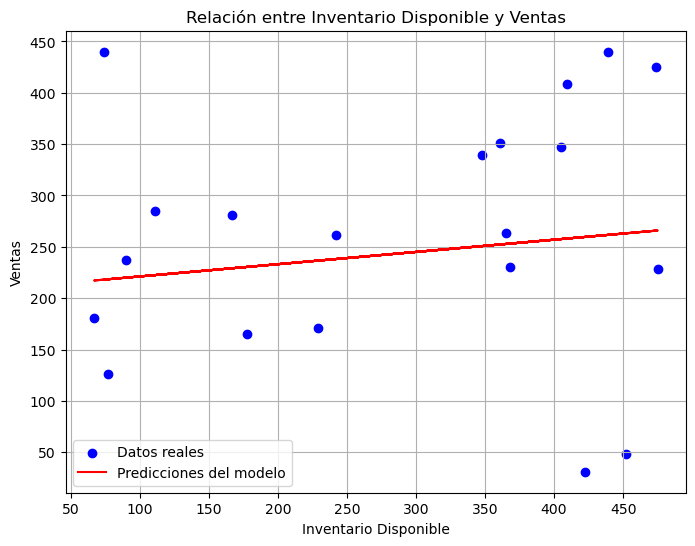

In [ ]:

# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Impofrtamos libreria para graficas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Definir el problema y objetivo
# El objetivo es predecir las ventas de productos en función de la cantidad de inventario disponible.

# 2. Recopilar y preprocesar los datos
# Creamos un conjunto de datos simulado con inventario y ventas históricas
#np.random establece una semilla de datos que se queda estatica de aqui en adelante dentro del programa.
np.random.seed(42)

data = {
    'inventario_disponible': np.random.randint(50, 500, size=100),  # Cantidad de inventario, arreglo de 100 enteros que estan entre 50 y 500
    'ventas': np.random.randint(30, 450, size=100)  # Ventas realizadas, arreglo de 100 enteros que estan entre 30 y 45
}
# Se crea un data frame de pandas
df = pd.DataFrame(data)

print(df)

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['inventario_disponible']]
y = df['ventas']

# se utiliza para dividir un conjunto de datos en dos subconjuntos: uno para entrenamiento (train) y otro para prueba (test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar un modelo de regresión lineal
model = LinearRegression()

model.fit(X_train, y_train)

# 5. Evaluar el modelo utilizando los datos de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse:.2f}")

# Graficar la relación entre inventario y ventas
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones del modelo')
plt.title("Relación entre Inventario Disponible y Ventas")
plt.xlabel("Inventario Disponible")
plt.ylabel("Ventas")
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 2: Aprendizaje No Supervisado – Agrupación de Productos Según Comportamiento

In [2]:

# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Definir el problema y objetivo
# Queremos identificar patrones en los productos según su stock e historial de ventas, usando clustering.

# 2. Recopilar y preprocesar los datos
#Usamos el mismo conjunto de datos de inventario y ventas, pero añadimos un nuevo campo simulado de "días en inventario"
df['dias_en_inventario'] = np.random.randint(1, 180, size=100)
print(df)

print("******************************************")
print("******************************************")
# miramos las primeras lineas del dataframe
print(df.head())
print("******************************************")
# verificamos el tipo de datos
print(df.info())
print("******************************************")
# comprobamos si existen valores faltante
print(df.isnull().sum())
print("******************************************")
# asegurarse que las columnas son numericas
print(df[['inventario_disponible', 'dias_en_inventario']].dtypes)
print("******************************************")
# Si hay valores nulos, eliminarlos o llenarlos con un valor específico
df = df.dropna()  # O usar df.fillna(valor) para rellenar los NaN
print("******************************************")

# convertir datos a numericos por si las moscas
df['inventario_disponible'] = pd.to_numeric(df['inventario_disponible'], errors='coerce')
df['dias_en_inventario'] = pd.to_numeric(df['dias_en_inventario'], errors='coerce')

# 3. Dividir los datos (no es necesario para clustering)
# Seleccionamos las características que usaremos para agrupar: inventario disponible y días en inventario
X = df[['inventario_disponible', 'dias_en_inventario']]

# 4. Entrenar el modelo de K-means para agrupar productos en 3 grupos
#kmeans = KMeans(n_clusters=3)
#df['cluster'] = kmeans.fit_predict(X)
#df['cluster'] = labels
from sklearn.cluster import AgglomerativeClustering

hclust = AgglomerativeClustering(n_clusters=3)
labels = hclust.fit_predict(X)
df['cluster'] = labels


# 5. Graficar los grupos de productos según inventario y días en inventario
plt.figure(figsize=(8, 6))
plt.scatter(df['inventario_disponible'], df['dias_en_inventario'], c=df['cluster'], cmap='rainbow', s=100, edgecolor='k')
plt.title("Clustering de productos según inventario y días en inventario")
plt.xlabel("Inventario Disponible")
plt.ylabel("Días en Inventario")
plt.grid(True)
plt.show()

print(df)

NameError: name 'df' is not defined

## Ejercicio 3: Aprendizaje por Refuerzo – Estrategia de Facturación para Maximizar Ganancias

In [ ]:

# Importamos las bibliotecas necesarias
import numpy as np

# 1. Definir el problema y objetivo
# El objetivo es encontrar una estrategia de facturación que maximice las ganancias a lo largo del tiempo.

# 2. Recopilar y preprocesar los datos (en refuerzo, el entorno genera los datos)
# Definimos un conjunto de clientes con diferentes precios dispuestos a pagar
clientes = ['Cliente_A', 'Cliente_B', 'Cliente_C']
precios_disponibles = [10, 20, 30]  # Diferentes precios para un producto

# 3. Definir la función de recompensa
# La recompensa es la ganancia obtenida al elegir un precio correcto para un cliente
def recompensa(cliente, precio):
    # Si el cliente está dispuesto a pagar más del precio ofrecido, se genera una ganancia
    disposiciones = {'Cliente_A': 20, 'Cliente_B': 25, 'Cliente_C': 15}
    if disposiciones[cliente] >= precio:
        return precio  # Ganancia es el precio vendido
    else:
        return 0  # No hay ganancia si el precio es demasiado alto

# 4. Entrenar el modelo (en este caso, simulamos los movimientos del agente)
# Simulamos 20 facturaciones y vemos qué precio maximiza las ganancias
ganancia_total = 0
for paso in range(20):
    cliente = np.random.choice(clientes)
    precio = np.random.choice(precios_disponibles)

    ganancia = recompensa(cliente, precio)
    ganancia_total += ganancia

    print(f"Paso {paso}: Cliente = {cliente}, Precio ofrecido = {precio}, Ganancia = {ganancia}")

print(f"Ganancia total después de 20 facturaciones: {ganancia_total}")


Paso 0: Cliente = Cliente_B, Precio ofrecido = 30, Ganancia = 0
Paso 1: Cliente = Cliente_A, Precio ofrecido = 10, Ganancia = 10
Paso 2: Cliente = Cliente_A, Precio ofrecido = 20, Ganancia = 20
Paso 3: Cliente = Cliente_B, Precio ofrecido = 30, Ganancia = 0
Paso 4: Cliente = Cliente_A, Precio ofrecido = 20, Ganancia = 20
Paso 5: Cliente = Cliente_B, Precio ofrecido = 10, Ganancia = 10
Paso 6: Cliente = Cliente_A, Precio ofrecido = 20, Ganancia = 20
Paso 7: Cliente = Cliente_C, Precio ofrecido = 30, Ganancia = 0
Paso 8: Cliente = Cliente_B, Precio ofrecido = 30, Ganancia = 0
Paso 9: Cliente = Cliente_B, Precio ofrecido = 30, Ganancia = 0
Paso 10: Cliente = Cliente_B, Precio ofrecido = 10, Ganancia = 10
Paso 11: Cliente = Cliente_B, Precio ofrecido = 10, Ganancia = 10
Paso 12: Cliente = Cliente_B, Precio ofrecido = 20, Ganancia = 20
Paso 13: Cliente = Cliente_A, Precio ofrecido = 10, Ganancia = 10
Paso 14: Cliente = Cliente_A, Precio ofrecido = 10, Ganancia = 10
Paso 15: Cliente = Client

In [ ]:



import pandas as pd
import numpy as np


# Creamos un DataFrame vacío
df = pd.DataFrame(columns=['Producto', 'Stock', 'Inventario', 'Total Vendidas pesos', 'Días en Inventario', 'Ganancia Bruta pesos'])


# Creamos un DataFrame vacío
df = pd.DataFrame({
    'Producto': [f'Producto {i+1}' for i in range(99)],
    'Stock': np.random.randint(10, 100, 99),
    'Inventario': np.random.randint(5, 20, 99),
    'Total Vendidas pesoss': np.random.randint(1, 10000, 99),
    'Días en Inventario': np.random.randint(1, 180, 99),
    'Ganancia Bruta pesos': np.random.randint(10, 1000, 99)
})

# Escribimos el DataFrame en un archivo CSV
df.to_csv('archivo.csv', index=False)

print("Archivo CSV creado con éxito!")

df.to_excel('archivo.xlsx', index=False)
print("Archivo excel creado con éxito!")

Archivo CSV creado con éxito!
Archivo excel creado con éxito!


# Archivos excel y CSV

El código proporcionado genera un conjunto de datos simulado que representa información sobre productos, como stock, inventario, ventas y ganancias. Luego, exporta estos datos a archivos CSV y Excel para su uso posterior en análisis o demostraciones.

In [ ]:
# Importamos las bibliotecas necesarias
import pandas as pd       # Biblioteca para manipulación y análisis de datos
import numpy as np        # Biblioteca para cálculos numéricos y generación de números aleatorios

# Generamos datos aleatorios para cada columna y creamos un DataFrame
df = pd.DataFrame({
    'Producto': [f'Producto {i+1}' for i in range(99)],                # Lista de nombres de productos del 1 al 99
    'Stock': np.random.randint(10, 100, 99),                           # Cantidad de stock entre 10 y 99
    'Inventario': np.random.randint(5, 20, 99),                        # Inventario entre 5 y 19
    'Total Vendidas pesos': np.random.randint(1, 10000, 99),           # Total vendido en pesos entre 1 y 9999
    'Días en Inventario': np.random.randint(1, 180, 99),               # Días en inventario entre 1 y 179
    'Ganancia Bruta pesos': np.random.randint(10, 1000, 99)            # Ganancia bruta en pesos entre 10 y 999
})

# Escribimos el DataFrame en un archivo CSV
df.to_csv('archivo.csv', index=False)  # Guardamos el DataFrame en 'archivo.csv' sin incluir el índice de filas

print("Archivo CSV creado con éxito!")  # Confirmación de que el archivo CSV se ha creado

# Escribimos el DataFrame en un archivo Excel
df.to_excel('archivo.xlsx', index=False)  # Guardamos el DataFrame en 'archivo.xlsx' sin incluir el índice de filas

print("Archivo Excel creado con éxito!")  # Confirmación de que el archivo Excel se ha creado


Archivo CSV creado con éxito!
Archivo Excel creado con éxito!


1. Importación de bibliotecas
Descripción:

Pandas (pd): Biblioteca esencial para la manipulación y análisis de datos estructurados en Python. Proporciona estructuras de datos como DataFrames y Series, que facilitan el manejo de datos tabulares y series temporales.

NumPy (np): Biblioteca fundamental para cálculos numéricos y manipulación de arreglos y matrices en Python. Es especialmente útil para generar números aleatorios y realizar operaciones matemáticas de alto rendimiento.

Función en el código:

El código importa estas bibliotecas para utilizar sus funcionalidades en la generación y manipulación de datos aleatorios, así como en la creación y exportación del DataFrame.

2. Creación del DataFrame vacío
Descripción:

Se crea inicialmente un DataFrame vacío con columnas predefinidas: 'Producto', 'Stock', 'Inventario', 'Total Vendidas pesos', 'Días en Inventario' y 'Ganancia Bruta pesos'.
Función en el código:

Aunque el código crea un DataFrame vacío inicialmente, este paso es redundante ya que posteriormente se crea un nuevo DataFrame que reemplaza al anterior. Este primer DataFrame vacío no se utiliza en los pasos siguientes.

3. Generación de datos aleatorios y creación del DataFrame
Descripción:

Lista de productos: Se genera una lista de nombres de productos numerados del 1 al 99 utilizando una comprensión de lista y formato de cadena. Cada producto se nombra como 'Producto 1', 'Producto 2', ..., 'Producto 99'.

Stock: Se generan 99 números enteros aleatorios entre 10 y 99. Representa la cantidad de unidades disponibles en stock para cada producto.

Inventario: Se generan 99 números enteros aleatorios entre 5 y 19. Indica el nivel actual de inventario de cada producto.

Total Vendidas pesos: Se generan 99 números enteros aleatorios entre 1 y 9999. Representa el total de ventas en pesos para cada producto.

Días en Inventario: Se generan 99 números enteros aleatorios entre 1 y 179. Indica el número de días que cada producto ha estado en inventario.

Ganancia Bruta pesos: Se generan 99 números enteros aleatorios entre 10 y 999. Representa la ganancia bruta en pesos obtenida por cada producto.

Función en el código:

Se utiliza la función pd.DataFrame() para crear un DataFrame a partir de un diccionario que contiene las listas generadas. Cada clave del diccionario corresponde al nombre de una columna, y cada valor es la lista de datos para esa columna.

Nota importante: Se observa que hay una discrepancia en el nombre de la columna 'Total Vendidas pesos', ya que en el código se escribe como 'Total Vendidas pesoss' (con una 's' extra). Este es un posible error tipográfico que podría causar confusiones al manipular los datos.

4. Exportación del DataFrame a un archivo CSV
Descripción:

Exportación a CSV: Se utiliza la función df.to_csv() para guardar el DataFrame en un archivo con formato CSV (Comma-Separated Values), que es un formato de texto plano ampliamente utilizado para almacenar datos tabulares.

Parámetros de la función:

'archivo.csv': Especifica el nombre del archivo de salida.
index=False: Indica que no se incluya la columna de índices (números de fila) en el archivo CSV, ya que no es necesaria para este caso.
Mensaje de confirmación: Se imprime un mensaje en pantalla para informar al usuario que el archivo CSV se ha creado con éxito.

Función en el código:

Esta sección del código guarda los datos generados en un archivo CSV llamado 'archivo.csv', facilitando su uso en otras aplicaciones o para su análisis posterior en herramientas que soportan este formato.
5. Exportación del DataFrame a un archivo Excel
Descripción:

Exportación a Excel: Se utiliza la función df.to_excel() para guardar el DataFrame en un archivo con formato Excel (.xlsx), que es ampliamente utilizado para el manejo y análisis de datos en hojas de cálculo.

Parámetros de la función:

'archivo.xlsx': Especifica el nombre del archivo de salida.
index=False: Indica que no se incluya la columna de índices en el archivo Excel.
Mensaje de confirmación: Se imprime un mensaje en pantalla para informar al usuario que el archivo Excel se ha creado con éxito.

Función en el código:

Esta sección del código guarda los datos generados en un archivo Excel llamado 'archivo.xlsx', permitiendo su apertura y manipulación en programas como Microsoft Excel o LibreOffice Calc.
Resumen de la funcionalidad del código
Generación de datos simulados: El código crea un conjunto de datos ficticio que simula información relevante sobre productos, lo cual puede ser útil para pruebas, demostraciones o aprendizaje de manipulación de datos.

Creación del DataFrame: Organiza los datos generados en una estructura tabular mediante un DataFrame de pandas, facilitando su manejo y análisis.

Exportación de datos: Permite almacenar los datos en dos formatos diferentes (CSV y Excel), ampliando las posibilidades de uso y compatibilidad con diversas herramientas y plataformas.

Mensajes de confirmación: Proporciona retroalimentación al usuario sobre el éxito de las operaciones de exportación, mejorando la experiencia de uso del script.

Posibles mejoras y consideraciones adicionales
Corrección de errores tipográficos: Revisar y corregir el posible error en el nombre de la columna 'Total Vendidas pesoss', eliminando la 's' adicional para evitar confusiones o errores en futuras manipulaciones del DataFrame.

Validación de datos: Implementar verificaciones adicionales para asegurar que los datos generados cumplen con las restricciones o requisitos específicos que puedan existir en un contexto real.

Documentación y comentarios: Añadir comentarios adicionales en el código (aunque no se incluyen en esta explicación según la instrucción) para mejorar la legibilidad y comprensión del código por parte de otros desarrolladores o usuarios.

Personalización de rangos: Permitir la configuración de los rangos utilizados en la generación de números aleatorios, de manera que el usuario pueda adaptar los datos simulados a diferentes escenarios o necesidades.

Inclusión de índices únicos: Considerar la posibilidad de añadir una columna con identificadores únicos para cada producto (por ejemplo, códigos SKU), lo cual es común en bases de datos de inventario y facilita la gestión de los productos.

Conclusión
Este código es una herramienta sencilla pero efectiva para generar un conjunto de datos simulado y exportarlo en formatos ampliamente utilizados. Es útil para practicar técnicas de manipulación de datos con pandas, familiarizarse con la generación de datos aleatorios con NumPy y comprender cómo exportar DataFrames a archivos CSV y Excel. Además, sirve como base para proyectos más complejos que requieran la generación y manejo de datos estructurados.